# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- ## Task 4: Exploring Results 
- Task 5: Building and Visualizing Interactive Network Graph



In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [2]:
model = Word2Vec.load('Data/w2v.model')

In [4]:
model.wv.most_similar(['orange'], topn=3)

[('tangerine', 0.8805058598518372),
 ('lemon', 0.8379998207092285),
 ('satsuma', 0.76882004737854)]

In [5]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split('\n')

In [6]:
items_for_sale[:3]

['salt', 'pepper', 'fresh']

In [7]:
words, vectors = [], []
for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f'Word {item} not found in vocab -- panic!')
        

In [8]:
model.wv.get_vector('soccer')

KeyError: "word 'soccer' not in vocabulary"

In [9]:
vectors[0]

array([-1.1482229 , -1.457796  ,  2.3968556 ,  3.396039  , -1.1881565 ,
        0.6968744 , -1.3518031 , -2.9706707 , -0.4669988 ,  1.1226897 ,
        1.1116413 , -2.739009  ,  0.24923934,  0.8646885 , -2.1179867 ,
       -1.876764  , -0.48666778, -1.2151374 ,  0.37879562,  0.252444  ,
       -3.3708858 ,  1.3180234 , -2.2768548 , -1.3832968 ,  1.0969254 ,
        0.27243912,  0.8193879 , -2.1894221 , -1.6592627 , -1.3595355 ,
       -3.934697  ,  0.7564211 ,  2.626951  ,  2.371165  ,  2.15938   ,
       -1.1281012 , -1.1448954 ,  5.3170867 , -0.49559382,  0.17314407,
        0.57441026,  2.53562   , -1.2812315 , -0.86197674,  0.7379161 ,
        0.14601311, -1.858111  , -2.994883  ,  1.2053301 , -1.1230711 ,
       -0.26118228,  0.31398162,  2.4952688 , -1.0690686 , -2.6519234 ,
        0.87918854, -0.26560682, -0.99998534, -1.709395  , -0.7432533 ,
       -0.9443455 ,  3.3094018 , -3.301763  , -2.2816048 ,  2.790047  ,
        2.2301333 , -0.263533  ,  1.4304705 , -2.1190748 , -3.75

In [10]:
sims = cosine_similarity(vectors, vectors)

In [11]:
sims.shape

(911, 911)

In [20]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<=j:
            sims[i, j] = False

In [28]:
k = 20
indices = list(range(len(vectors)))

In [29]:
random.shuffle(indices)

In [30]:
indices = indices[:k]

In [31]:
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

In [32]:
small_sims = cosine_similarity(small_vectors, small_vectors)

In [33]:
for x in range(len(small_vectors)):
    small_sims[x, x] = 0

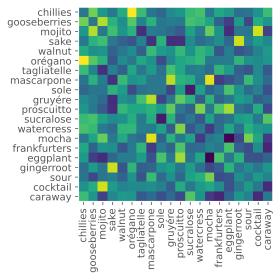

In [34]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [35]:
np.savetxt('Data/words.txt', words, fmt='%s')
np.save('Data/vectors.npy', vectors)